In [1]:
import numpy as np 
from matplotlib import pyplot as plt
from os import system

In [2]:
sys.path.append('../')
import gridemic

In [3]:
SEIIR = gridemic.Model(seed_random = 1, N = 100)
SEIIR.add_infectious()

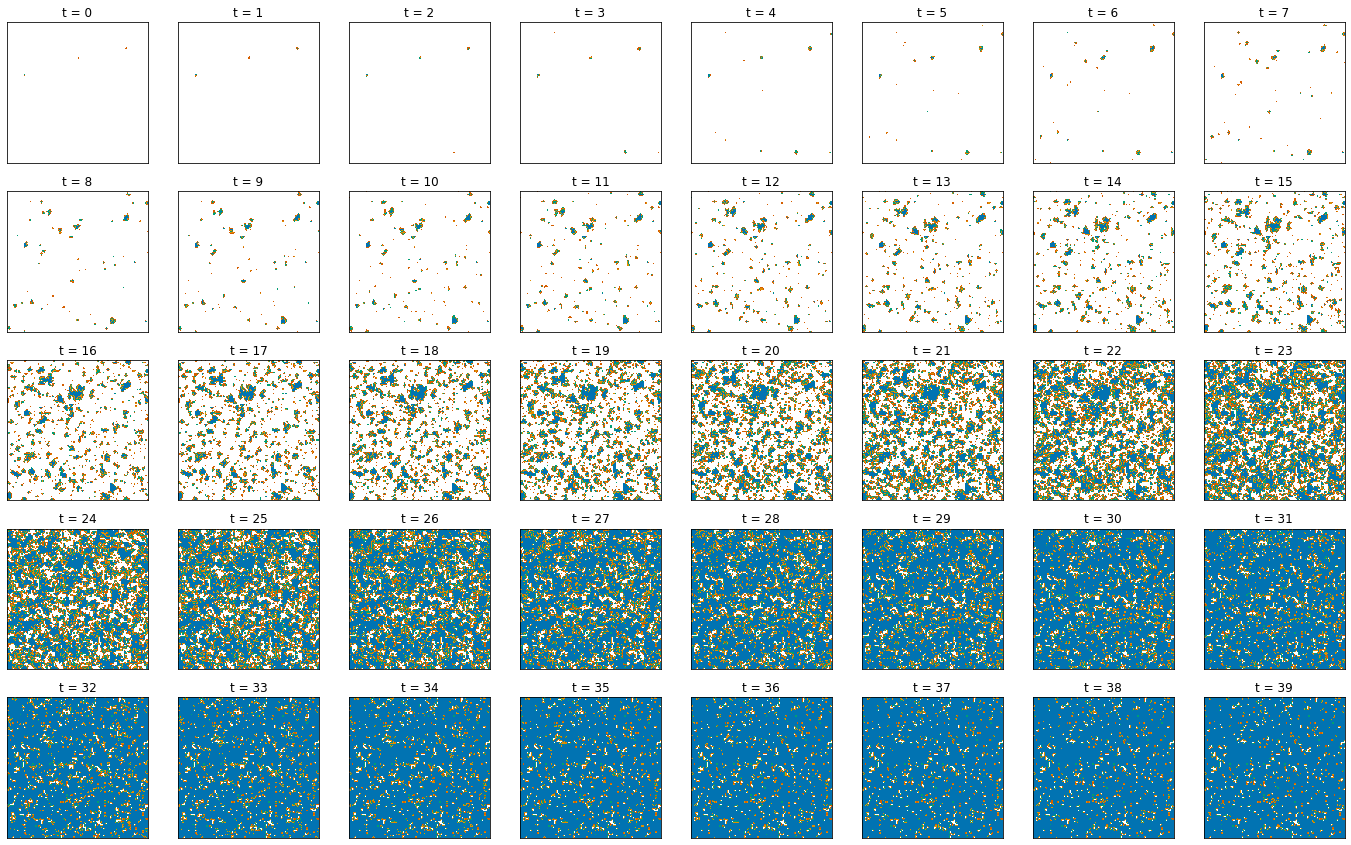

In [4]:
t_final = 40
nrows = 5
ncols = 8

fig, axes = plt.subplots(nrows=nrows, ncols = ncols, figsize=(24, 15))
population = np.zeros((t_final, 6))

while SEIIR.time < t_final:
    ax = SEIIR.visualize(axes[SEIIR.time // ncols, SEIIR.time % ncols])
    ax.set_title(f't = {SEIIR.time}')

    population[SEIIR.time, 0] = np.sum(SEIIR.disease_state==0) # S
    population[SEIIR.time, 1] = np.sum(SEIIR.disease_state==1) # E
    population[SEIIR.time, 2] = np.sum(SEIIR.disease_state==2) # I_w
    population[SEIIR.time, 3] = np.sum(SEIIR.disease_state==3) # I_s
    population[SEIIR.time, 4] = np.sum(SEIIR.disease_state==4) # I_R
    population[SEIIR.time, 5] = (np.sum(SEIIR.testing_state==3) 
                        + np.sum(SEIIR.testing_state==4)) # cases

    SEIIR.evolve()


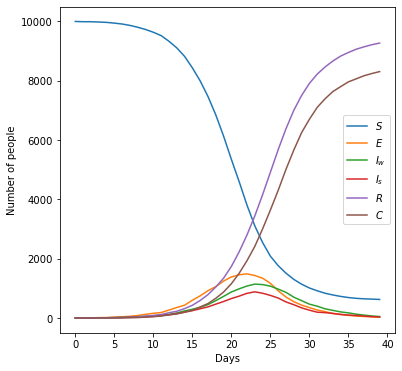

In [5]:
fig_pop = plt.figure(figsize = (6, 6))
ax = fig_pop.gca()
ax.plot(population[:, 0], label='$S$')
ax.plot(population[:, 1], label='$E$')
ax.plot(population[:, 2], label='$I_w$')
ax.plot(population[:, 3], label='$I_s$')
ax.plot(population[:, 4], label='$R$')
ax.plot(population[:, 5], label='$C$')
ax.set_xlabel('Days')
ax.set_ylabel('Number of people')
ax.legend()